# Homework 2: Modeling

Mehdad Zaman

For all tasks below, answer all tasks as shown in the document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.




## Task 1 - Data Cleaning

In [1]:
# TODO: code to clean the data
import pandas as pd

taxi_df_unfiltered = pd.read_csv('taxi_fare.csv')
taxi_fare_df = taxi_df_unfiltered[(taxi_df_unfiltered['fare_amount'] > 0.00)
                                  & (taxi_df_unfiltered['pickup_longitude'] != 0)
                                  & (taxi_df_unfiltered['pickup_latitude'] != 0)
                                  & (taxi_df_unfiltered['dropoff_longitude'] != 0)
                                  & (taxi_df_unfiltered['dropoff_latitude'] != 0)
                                  & (taxi_df_unfiltered['dropoff_longitude'] <= -71.4725) & (taxi_df_unfiltered['dropoff_longitude'] >= -79.4554)
                                  & (taxi_df_unfiltered['dropoff_latitude'] <= 45.042) & (taxi_df_unfiltered['dropoff_latitude'] >= 40.294)
                                  & (taxi_df_unfiltered['pickup_longitude'] <= -71.4725) & (taxi_df_unfiltered['pickup_longitude'] >= -79.4554)
                                  & (taxi_df_unfiltered['pickup_latitude'] <= 45.042) & ( taxi_df_unfiltered['pickup_latitude'] >= 40.294)
                                  & (taxi_df_unfiltered['passenger_count'] > 0) & (taxi_df_unfiltered['passenger_count'] < 7)]

taxi_fare_df.to_csv('taxi_fare_filtered.csv', index=False)
taxi_fare_df = pd.read_csv('taxi_fare_filtered.csv')

taxi_fare_df['time_stamp'] = pd.to_datetime(taxi_fare_df['pickup_datetime'])
taxi_fare_df['hour'] = taxi_fare_df['time_stamp'].dt.hour
taxi_fare_df['month'] = taxi_fare_df['time_stamp'].dt.month
taxi_fare_df['year'] = taxi_fare_df['time_stamp'].dt.year
taxi_fare_df['day'] = taxi_fare_df['time_stamp'].dt.day

taxi_fare_df.drop('time_stamp', axis=1, inplace=True)
taxi_fare_df.drop('pickup_datetime', axis=1, inplace=True)

I made sure to exclude all non-positive values for passenger count and fare_amounts, as the price and number of passengers must be positive. I limited the number of passengers to 6 because the maximum capacity for the largest NYC taxis is seven including the driver (SUVs and minivans). I removed any data where either the latitude or longitude for either the dropoff or pickup locations was 0 because these would not represent valid coordinates in the area. I also only used longitude values between and latitude values that were in New York (these coordinates were found from an online resource). In addition, I cleaned the data by creating several integer columns that would hold components of the date. Dropping the String representations of the data, and using numerical data will be useful later on for the linear regression.

## Task 2 - Train Test Split

In [2]:
# TODO: code to split the data into training set and test set
import sklearn.model_selection

taxi_fare_train_dataset, taxi_fare_test_dataset = sklearn.model_selection.train_test_split(taxi_fare_df, train_size=0.8, test_size=0.2)
taxi_fare_test_dataset.to_csv('taxi_fare_test.csv', index=False)
taxi_fare_train_dataset.to_csv('taxi_fare_train.csv', index=False)

I did an 80/20 split of the filtered dataset between the training dataset, which I allocated approximately 80% of the data to, and the testing dataset, which I allocated approximately 20% of the data to. I performed this split using the "train_test_split" method in the "sklearn.model_selection package."

## Task 3 - Pearson Correlation

In [3]:
# TODO: code to compute Pearson correlation
import scipy.stats

taxi_fare_train_dataset = pd.read_csv('taxi_fare_train.csv')

taxi_fare_train_dataset['Euclidean Distance'] = ((((taxi_fare_train_dataset['dropoff_longitude'] - taxi_fare_train_dataset['pickup_longitude']) ** 2)
                                                + ((taxi_fare_train_dataset['dropoff_latitude'] - taxi_fare_train_dataset['pickup_latitude']) ** 2)) ** 0.5)
part_3a_coefficient = scipy.stats.pearsonr(taxi_fare_train_dataset['Euclidean Distance'], taxi_fare_train_dataset['fare_amount'])

part_3b_coefficient = scipy.stats.pearsonr(taxi_fare_train_dataset['hour'], taxi_fare_train_dataset['Euclidean Distance'])

part_3c_coefficient = scipy.stats.pearsonr(taxi_fare_train_dataset['hour'], taxi_fare_train_dataset['fare_amount'])

print("Pearson correlation between Euclidean distance of the ride and the taxi fare: " + str(part_3a_coefficient[0]))
print("Pearson correlation between time of day and distance traveled:" + str(part_3b_coefficient[0]))
print("Pearson correlation between time of day and the taxi fare:" + str(part_3c_coefficient[0]))

Pearson correlation between Euclidean distance of the ride and the taxi fare: 0.7851174589969229
Pearson correlation between time of day and distance traveled:-0.027506922019254528
Pearson correlation between time of day and the taxi fare:-0.017727329883107514


The highest correlation was the correlation between the Euclidean Distance of the ride and the taxi fare amount (part a).

## Task 4 - Visualization

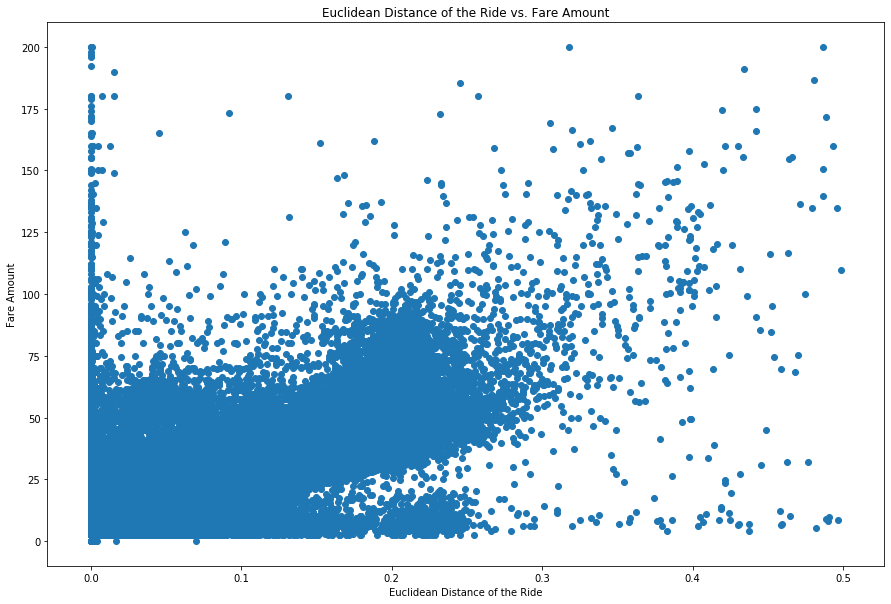

In [4]:
# TODO: code to visualize Task 3
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))

taxi_fare_train_dataset_plot = taxi_fare_train_dataset[(taxi_fare_train_dataset['Euclidean Distance'] != 0) 
                                                       & (taxi_fare_train_dataset['Euclidean Distance'] < 0.5) 
                                                       & (taxi_fare_train_dataset['fare_amount'] <= 200.00)]

plt.scatter(taxi_fare_train_dataset_plot['Euclidean Distance'], taxi_fare_train_dataset_plot['fare_amount'])
plt.xlabel('Euclidean Distance of the Ride')
plt.ylabel('Fare Amount')
plt.title('Euclidean Distance of the Ride vs. Fare Amount')
plt.show()

This plot, representing the relationship between the distance traveled and the fare amount shows a strong correlation. In the training set, I calculated the Euclidean distance between the pickup and dropoff coordinates. I eliminated a few outliers, such as when the total distance of the ride was equal to 0. I filtered out outliers where the distance was greater than 0.5 of a latitude/longitude degree because most of the data was within this range. I also removed data from the plot, where the price of the fare was greater than 200 dollars which represented outliers. With the outliers removed, the plot shows that there is a strong relationship between the total distance of the ride and the fare amount.

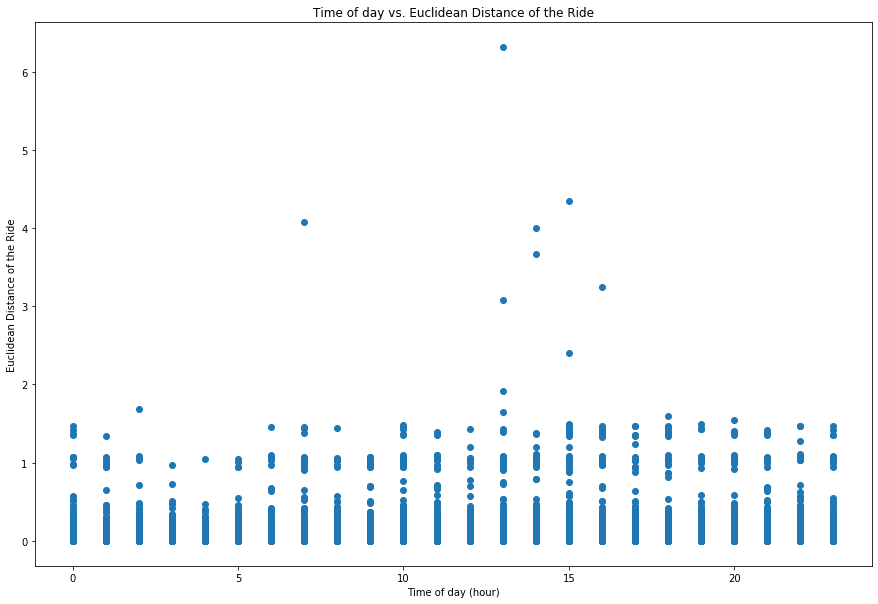

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(taxi_fare_train_dataset['hour'], taxi_fare_train_dataset['Euclidean Distance'])
plt.xlabel('Time of day (hour)')
plt.ylabel('Euclidean Distance of the Ride')
plt.title('Time of day vs. Euclidean Distance of the Ride')
plt.show()

This plot, representing the relationship between the time of day and the distance traveled shows a weak correlation. There is little to no linearity between the data. This can also be seen by the Pearson correlation coefficient, which is close to zero. The data is shown as multiple vertical lines.

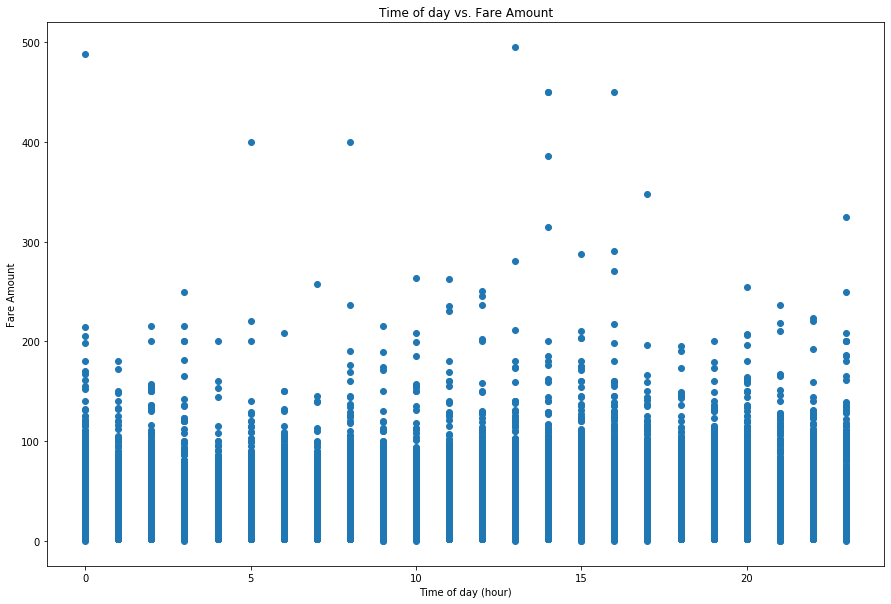

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(taxi_fare_train_dataset['hour'], taxi_fare_train_dataset['fare_amount'])
plt.xlabel('Time of day (hour)')
plt.ylabel('Fare Amount')
plt.title('Time of day vs. Fare Amount')
plt.show()

This plot, representing the relationship between time and the fare amount shows a weak correlation. There is little to no linearity between the data. This can also be seen by the Pearson correlation coefficient, which is close to zero. The data is shown as multiple vertical lines.

## Part 5 - Linear Regression

In [7]:
# TODO: code to build a linear regression model, make predictions, 
# and evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

taxi_fare_test_dataset = pd.read_csv('taxi_fare_test.csv')
taxi_fare_test_dataset['Euclidean Distance'] = ((((taxi_fare_test_dataset['dropoff_longitude'] - taxi_fare_test_dataset['pickup_longitude']) ** 2)
                                                 + ((taxi_fare_test_dataset['dropoff_latitude'] - taxi_fare_test_dataset['pickup_latitude']) ** 2)) ** 0.5)

fare_test_actual = taxi_fare_test_dataset['fare_amount']
taxi_fare_test_dataset.drop('fare_amount', axis=1, inplace=True)
taxi_fare_test_dataset.drop('key', axis=1, inplace=True)

taxi_fare_train_dataset = pd.read_csv('taxi_fare_train.csv')
taxi_fare_train_dataset['Euclidean Distance'] = ((((taxi_fare_train_dataset['dropoff_longitude'] - taxi_fare_train_dataset['pickup_longitude']) ** 2)
                                                 + ((taxi_fare_train_dataset['dropoff_latitude'] - taxi_fare_train_dataset['pickup_latitude']) ** 2)) ** 0.5)

fare_train_actual = taxi_fare_train_dataset['fare_amount']
taxi_fare_train_dataset.drop('fare_amount', axis=1, inplace=True)
taxi_fare_train_dataset.drop('key', axis=1, inplace=True)

regressionTime = LinearRegression()
regressionTime.fit(taxi_fare_train_dataset[['hour']], fare_train_actual)
fare_test_predictor = regressionTime.predict(taxi_fare_test_dataset[['hour']])

fare_test_comparison = fare_test_actual.to_frame()
fare_test_comparison.columns = ['Actual Fare Data']

fare_test_comparison['Predicted Fare Data'] = fare_test_predictor

print("Coefficient for hour feature: " + str(regressionTime.coef_))
print("Mean Squared Error while using hour: " + str(mean_squared_error(fare_test_comparison['Actual Fare Data'], fare_test_comparison['Predicted Fare Data'])))

regressionDistance = LinearRegression()
regressionDistance.fit(taxi_fare_train_dataset[['Euclidean Distance']], fare_train_actual)
fare_test_predictor = regressionDistance.predict(taxi_fare_test_dataset[['Euclidean Distance']])

fare_test_comparison = fare_test_actual.to_frame()
fare_test_comparison.columns = ['Actual Fare Data']

fare_test_comparison['Predicted Fare Data'] = fare_test_predictor

print("Coefficient for Euclidean Distance feature: " + str(regressionDistance.coef_))
print("Mean Squared Error while using Euclidean Distance: " + str(mean_squared_error(fare_test_comparison['Actual Fare Data'], fare_test_comparison['Predicted Fare Data'])))

Coefficient for hour feature: [-0.0265256]
Mean Squared Error while using hour: 94.79746579579584
Coefficient for Euclidean Distance feature: [178.96871183]
Mean Squared Error while using Euclidean Distance: 38.047305342572194


The linear regression model performs relatively well. The MSE (mean squared error) using the "hour" attribute as the feature was almost three times as high as the value of the MSE acquired while using "Euclidean distance" as the feature, which was relatively close to 0.

The most important variable for predicting the fare amount is the "Euclidean distance." This variable had the highest Pearson correlation coefficient in part 3 in relation to the fare amount and an MSE that was closer to 0 compared to the MSE involving the "hour" feature.

## Part 6 - Another Prediction Model

In [8]:
# TODO: code for another model and its evaluation
# training data fit
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

taxi_fare_test_dataset = pd.read_csv('taxi_fare_test.csv')
taxi_fare_test_dataset['Euclidean Distance'] = ((((taxi_fare_test_dataset['dropoff_longitude'] - taxi_fare_test_dataset['pickup_longitude']) ** 2)
                                                 + ((taxi_fare_test_dataset['dropoff_latitude'] - taxi_fare_test_dataset['pickup_latitude']) ** 2)) ** 0.5)

fare_test_actual = taxi_fare_test_dataset['fare_amount']
taxi_fare_test_dataset.drop('fare_amount', axis=1, inplace=True)
taxi_fare_test_dataset.drop('key', axis=1, inplace=True)

taxi_fare_train_dataset = pd.read_csv('taxi_fare_train.csv')
taxi_fare_train_dataset['Euclidean Distance'] = ((((taxi_fare_train_dataset['dropoff_longitude'] - taxi_fare_train_dataset['pickup_longitude']) ** 2)
                                                 + ((taxi_fare_train_dataset['dropoff_latitude'] - taxi_fare_train_dataset['pickup_latitude']) ** 2)) ** 0.5)

fare_train_actual = taxi_fare_train_dataset['fare_amount']
taxi_fare_train_dataset.drop('fare_amount', axis=1, inplace=True)
taxi_fare_train_dataset.drop('key', axis=1, inplace=True)

regressionRf = RandomForestRegressor(n_estimators = 20, random_state = 42)
regressionRf.fit(taxi_fare_train_dataset, fare_train_actual)
fare_test_predictor = regressionRf.predict(taxi_fare_test_dataset)

fare_test_comparison = fare_test_actual.to_frame()
fare_test_comparison.columns = ['Actual Fare Data']

fare_test_comparison['Predicted Fare Data'] = fare_test_predictor

print("MSE while using random forests algorithim and more features: " + str(mean_squared_error(fare_test_comparison['Actual Fare Data'], fare_test_comparison['Predicted Fare Data'])))

MSE while using random forests algorithim and more features: 15.419185135898823


Instead of using a simple regression model, I used multiple regression (several independent variables). My independent variables included Euclidean distance latitude/longitude points of the dropoff and pickup locations. While cleaning my data, I also extrapolated the hour, day, month, and year from the date string. I included these variables as part of my independent explanatory variables. I also used the random forest machine learning algorithm instead of linear regression. These changes and this algorithm performed significantly better than the results produced by the linear regression in part 5. The MSE (mean squared error) was approximately half of the mean square error observed by the predictions in part 5.